In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
def addDirection(file, filename):
    if filename[-5] == '0':
        file['direction'] = 0
    elif filename[-5] == '1':
        file['direction'] = 1
    elif filename[-5] == '2':
        file['direction'] = 2
    elif filename[-5] == '3':
        file['direction'] = 3
    elif filename[-5] == '4':
        file['direction'] = 4
    elif filename[-5] == '5':
        file['direction'] = 5
    elif filename[-5] == '6':
        file['direction'] = 6
    elif filename[-5] == '7':
        file['direction'] = 7
    elif filename[-5] == '8':
        file['direction'] = 8
    elif filename[-5] == '9':
        file['direction'] = 9
    else :
        file['direction'] = -1
    
    return file

def addDegree(file, filename):
    if filename[-9] == '0':
        file['degree'] = 0
    elif filename[-9] == '1':
        file['degree'] = 1
    else :
        file['degree'] = -1
        
def addBelt(file, filename):
    if filename[-7] == '0':
        file['belt'] = 0
    elif filename[-7] == '1':
        file['belt'] = 1
    elif filename[-7] == '2':
        file['belt'] = 2
    else :
        file['belt'] = -1

def CallFiles():
    #리스트, 집합 등의 자료구조를 통해 약 300개의 파일을 불러와 정리
    xyz_df_list = glob.glob('./datasets/*')
    return xyz_df_list

def AttachLabel(xyz_df_list):
    #현재 fileList에는 x,y,z가속도 변수만 존재. label과 꽉조인 정도, 각도 정도 총 3개의 column을 추가시켜야 함
    fileList=[]
    columns = ['x', 'y', 'z']
    for i, filename in enumerate(xyz_df_list):
        file = pd.read_csv(filename)
        file.columns = columns
        file['degree'] = 0
        file['belt'] = 0
        file['direction'] = 0
        addDegree(file, filename)
        addBelt(file, filename)
        addDirection(file, filename)
        fileList.append(file)
        
    return fileList

def Concatenation(fileList):
    #fileList안의 모든 파일을 df로 합치기
    df = pd.concat(fileList)
    return df

def Analysis(data_set):
    #합친 df를 이용하여 여러가지 데이터 분석을 통해 수치 확인하기
    
    n_value = data_set.isnull().sum().sum()
    print('null 개수: ',n_value)
    print(data_set.describe())
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_set['x'], data_set['y'], data_set['z'], c=data_set['direction'], marker='o', s=15, cmap='Greens')
    plt.show()
    
    scatter_plot=  plt.figure()
    axes1 = scatter_plot.add_subplot(1,1,1)
    axes1.scatter(data_set['x'], data_set['y'], c=data_set['direction'])
    axes1.set_xlabel('x')
    axes1.set_ylabel('y')
    
    scatter_plot=  plt.figure()
    axes1 = scatter_plot.add_subplot(1,1,1)
    axes1.scatter(data_set['y'], data_set['z'], c=data_set['direction'])
    axes1.set_xlabel('y')
    axes1.set_ylabel('z')
    
    scatter_plot=  plt.figure()
    axes1 = scatter_plot.add_subplot(1,1,1)
    axes1.scatter(data_set['x'], data_set['z'], c=data_set['direction'])
    axes1.set_xlabel('x')
    axes1.set_ylabel('z')
    
    ax = plt.subplots()
    ax = sns.boxplot(x='direction', y='x', data=data_set)
    ax.set_title('Boxplot of x by direction')
    ax.set_xlabel('Direction')
    ax.set_ylabel('x')
    
    ax = plt.subplots()
    ax = sns.boxplot(x='direction', y='y', data=data_set)
    ax.set_title('Boxplot of y by direction')
    ax.set_xlabel('Direction')
    ax.set_ylabel('y')
    
    ax = plt.subplots()
    ax = sns.boxplot(x='direction', y='z', data=data_set)
    ax.set_title('Boxplot of z by direction')
    ax.set_xlabel('Direction')
    ax.set_ylabel('z')
    
    ax = plt.subplots()
    ax = sns.boxplot(x='degree', y='x', data=data_set)
    ax.set_title('Boxplot of x by degree')
    ax.set_xlabel('Degree')
    ax.set_ylabel('x')
    
    ax = plt.subplots()
    ax = sns.boxplot(x='degree', y='y', data=data_set)
    ax.set_title('Boxplot of y by degree')
    ax.set_xlabel('Degree')
    ax.set_ylabel('y')
    
    ax = plt.subplots()
    ax = sns.boxplot(x='degree', y='z', data=data_set)
    ax.set_title('Boxplot of z by degree')
    ax.set_xlabel('Degree')
    ax.set_ylabel('z')
    
    ax = plt.subplots()
    ax = sns.boxplot(x='belt', y='x', data=data_set)
    ax.set_title('Boxplot of x by belt')
    ax.set_xlabel('belt')
    ax.set_ylabel('x')
    
    ax = plt.subplots()
    ax = sns.boxplot(x='belt', y='y', data=data_set)
    ax.set_title('Boxplot of y by belt')
    ax.set_xlabel('belt')
    ax.set_ylabel('y')
    
    ax = plt.subplots()
    ax = sns.boxplot(x='belt', y='z', data=data_set)
    ax.set_title('Boxplot of z by belt')
    ax.set_xlabel('belt')
    ax.set_ylabel('z')
    return

def SaveFile(df):
    #df를 csv파일로 저장하기
    df.to_csv("./data_set_ver2.csv", header = False, index = False)
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    train = pd.concat([X_train, y_train], axis = 1)
    test = pd.concat([X_test, y_test], axis = 1)
    train.to_csv("./data_set_train.csv", header =False, index = False)
    test.to_csv("./data_set_test.csv", header =False, index = False)
    return


In [3]:
xyz_df_list = CallFiles()
fileList = AttachLabel(xyz_df_list)

In [4]:
print(fileList)

[        x      y     z  degree  belt  direction
0    3648 -13504  8640       0     0          0
1    3904 -13568  8512       0     0          0
2    3904 -13440  8704       0     0          0
3    3840 -13568  8704       0     0          0
4    3968 -13504  8576       0     0          0
..    ...    ...   ...     ...   ...        ...
151  3968 -13376  8832       0     0          0
152  3968 -13312  8896       0     0          0
153  3840 -13376  8768       0     0          0
154  3840 -13312  8960       0     0          0
155  3904 -13248  8768       0     0          0

[156 rows x 6 columns],         x      y     z  degree  belt  direction
0   -3072 -12736  9600       0     0          1
1   -3200 -12928  9472       0     0          1
2   -3200 -12672  9664       0     0          1
3   -3200 -12864  9472       0     0          1
4   -3136 -12928  9600       0     0          1
..    ...    ...   ...     ...   ...        ...
150 -3136 -12928  9344       0     0          1
151 -3136 -128

In [5]:
data_set=Concatenation(fileList)
print(data_set)

        x      y     z  degree  belt  direction
0    3648 -13504  8640       0     0          0
1    3904 -13568  8512       0     0          0
2    3904 -13440  8704       0     0          0
3    3840 -13568  8704       0     0          0
4    3968 -13504  8576       0     0          0
..    ...    ...   ...     ...   ...        ...
150 -2496 -14848 -5120       1     2          8
151 -2560 -14912 -4864       1     2          8
152 -2560 -14848 -4992       1     2          8
153 -2560 -14848 -5120       1     2          8
154 -2496 -14976 -5056       1     2          8

[50987 rows x 6 columns]


null 개수:  0
                  x             y             z        degree          belt  \
count  50987.000000  50987.000000  50987.000000  50987.000000  50987.000000   
mean     276.003217 -14912.981584    -28.251280      0.500088      0.998156   
std     3811.968337   1441.740547   4968.585771      0.500005      0.817327   
min   -10112.000000 -19328.000000 -12160.000000      0.000000      0.000000   
25%    -2176.000000 -15872.000000  -3648.000000      0.000000      0.000000   
50%      576.000000 -15424.000000   -256.000000      1.000000      1.000000   
75%     2816.000000 -14400.000000   3072.000000      1.000000      2.000000   
max     9472.000000  -6336.000000  14528.000000      1.000000      2.000000   

          direction  
count  50987.000000  
mean       4.009473  
std        2.585199  
min        0.000000  
25%        2.000000  
50%        4.000000  
75%        6.000000  
max        8.000000  


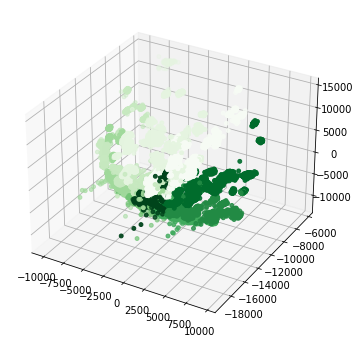

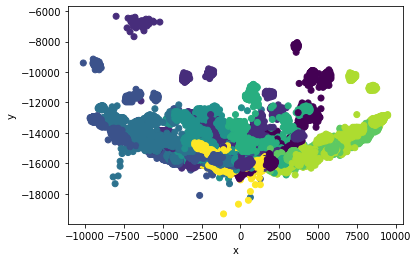

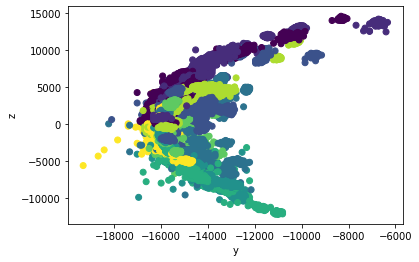

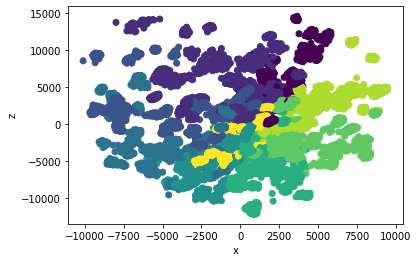

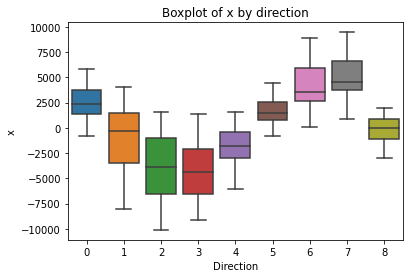

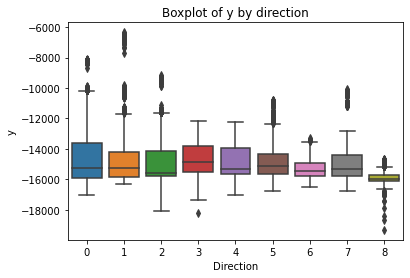

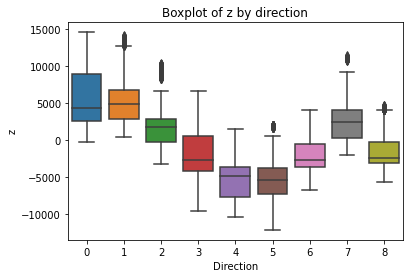

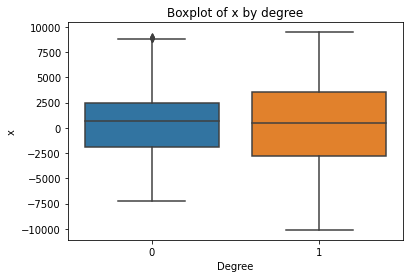

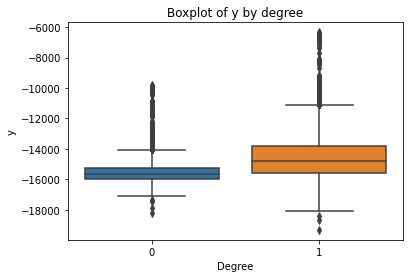

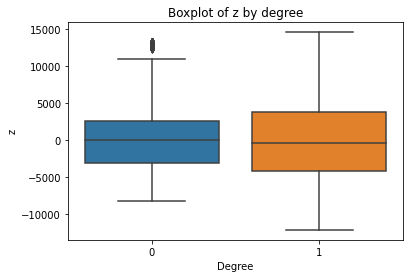

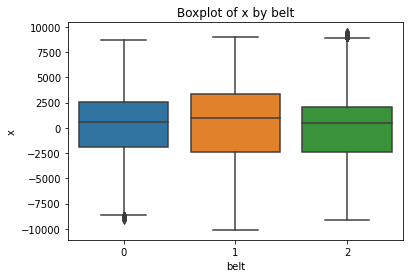

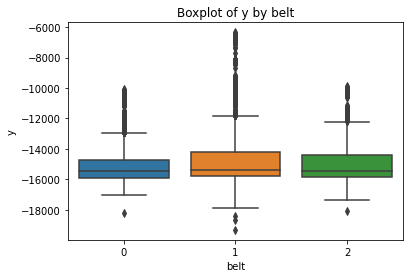

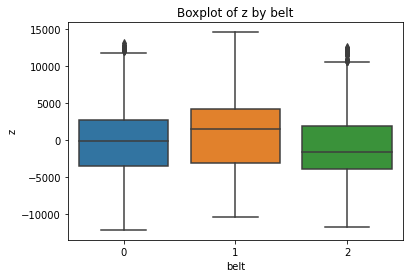

In [6]:
Analysis(data_set)

In [7]:
SaveFile(data_set)